## 1.0 Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2.0 Data Ingestion

In [14]:
df_raw = pd.read_csv('data/25-10-2022_updated_2.csv', parse_dates=['DT_CARREGAMENTO'])
df_raw.head()

,DT_CARREGAMENTO,NOME_EMBARCADOR,VOLUME_VIAGENS
0,2018-10-09,LDC Brasil,19
1,2018-10-10,LDC Brasil,191
2,2018-10-11,LDC Brasil,189
3,2018-10-12,LDC Brasil,84
4,2018-10-13,LDC Brasil,51


## 3.0 Data Quality

### 3.1 Check NAN values

In [15]:
df_raw.isna().sum().sum()

0

### 3.2 Check negative number of freights

In [16]:
df_raw[df_raw['VOLUME_VIAGENS'] < 0].size

0

### 3.3 Check data types

In [17]:
df_raw.dtypes

DT_CARREGAMENTO    datetime64[ns]
NOME_EMBARCADOR            object
VOLUME_VIAGENS              int64
dtype: object

### 3.4 Check embarcadores

In [18]:
df_raw['NOME_EMBARCADOR'].value_counts()

LDC Brasil                                            1477
Amaggi                                                1186
Amaggi Louis Dreyfus Zen-noh Grãos S.A                 765
SIERENTZ AGRO BRASIL LTDA.                              83
ADM DO BRASIL LTDA                                      68
Suporte Carguero Embarcador 1 QA                        59
G10 TRANSPORTES S.A                                     16
FRIBON TRANSPORTES LTDA PILOTO                          15
LDC Pluma                                               10
YNOVA TRANSPORTES E LOGÍSTICA LTDA                       4
ETC - Rodrigo Honorato Ferreira - Solucoes Logisti       2
Publicacao Nuvem                                         1
Rodolider Embarcador                                     1
Sul Transportes                                          1
S E TRANSPORTES E REPRESENTACOES LTDA                    1
Name: NOME_EMBARCADOR, dtype: int64

In [19]:
df_raw['NOME_EMBARCADOR'] = df_raw['NOME_EMBARCADOR'].replace('Amaggi Louis Dreyfus Zen-noh Grãos S.A', 'ALZ')

## 4.0 Data Description

In [20]:
df_stats = df_raw.copy()

### 4.1 Temporal features

In [21]:
df_stats['year'] = df_stats['DT_CARREGAMENTO'].dt.year
df_stats['month'] = df_stats['DT_CARREGAMENTO'].dt.month
df_stats['weekofyear'] = df_stats['DT_CARREGAMENTO'].dt.isocalendar().week
df_stats['day'] = df_stats['DT_CARREGAMENTO'].dt.day
df_stats['dayofweek'] = df_stats['DT_CARREGAMENTO'].dt.dayofweek

In [36]:
df_stats[(df_stats['NOME_EMBARCADOR']=='LDC Brasil')].sort_values('VOLUME_VIAGENS', ascending=False).head(20)

,DT_CARREGAMENTO,NOME_EMBARCADOR,VOLUME_VIAGENS,year,month,weekofyear,day,dayofweek
3466,2022-09-04,LDC Brasil,5845,2022,9,35,4,6
114,2019-01-31,LDC Brasil,4610,2019,1,5,31,3
210,2019-05-07,LDC Brasil,3096,2019,5,19,7,1
226,2019-05-23,LDC Brasil,2788,2019,5,21,23,3
290,2019-07-16,LDC Brasil,2693,2019,7,29,16,1
129,2019-02-15,LDC Brasil,2576,2019,2,7,15,4
115,2019-02-01,LDC Brasil,2503,2019,2,5,1,4
3461,2022-09-03,LDC Brasil,1996,2022,9,35,3,5
191,2019-04-18,LDC Brasil,1926,2019,4,16,18,3
794,2020-03-31,LDC Brasil,1819,2020,3,14,31,1


### 4.2 

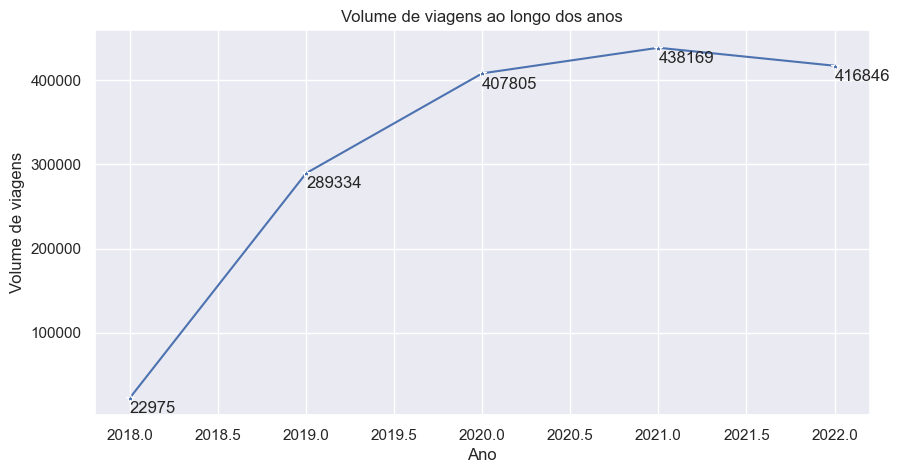

In [22]:
sns.set(rc={'figure.figsize':(10,5)})

col = 'VOLUME_VIAGENS'

df_aux = df_stats[['year', col]].groupby('year').sum().reset_index()

sns.lineplot(data=df_aux, x='year', y='VOLUME_VIAGENS', marker='*');

for x, y in zip(df_aux['year'], df_aux['VOLUME_VIAGENS']):
    plt.text(x = x, y = y-18000, s = '{:.0f}'.format(y))

plt.title('Volume de viagens ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Volume de viagens')
plt.show();

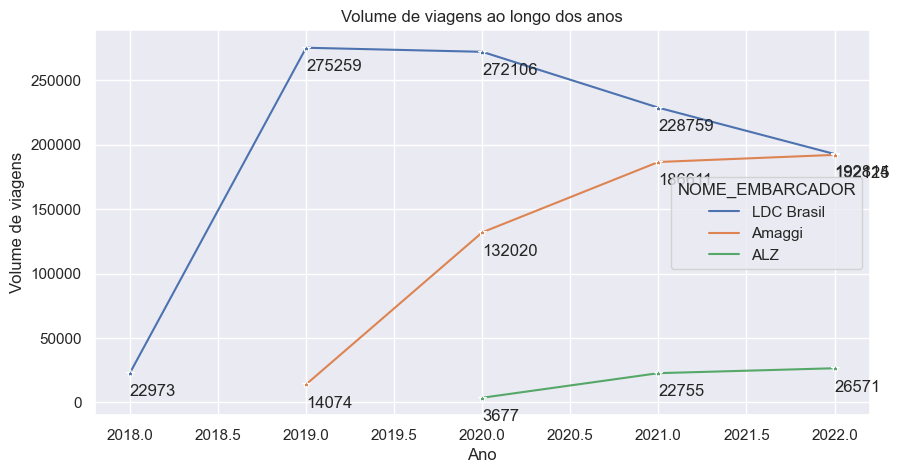

In [23]:
sns.set(rc={'figure.figsize':(10,5)})

embarcadores = ['LDC Brasil', 'Amaggi', 'ALZ']

col = 'VOLUME_VIAGENS'

df_aux = df_stats[df_stats['NOME_EMBARCADOR'].isin(embarcadores)][['year', 'NOME_EMBARCADOR', col]].groupby(['year', 'NOME_EMBARCADOR']).sum().reset_index()
sns.lineplot(data=df_aux, x='year', y='VOLUME_VIAGENS', marker='*', hue='NOME_EMBARCADOR');

for x, y in zip(df_aux['year'], df_aux['VOLUME_VIAGENS']):
    plt.text(x = x, y = y-18000, s = '{:.0f}'.format(y))

plt.title('Volume de viagens ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Volume de viagens')
plt.show();

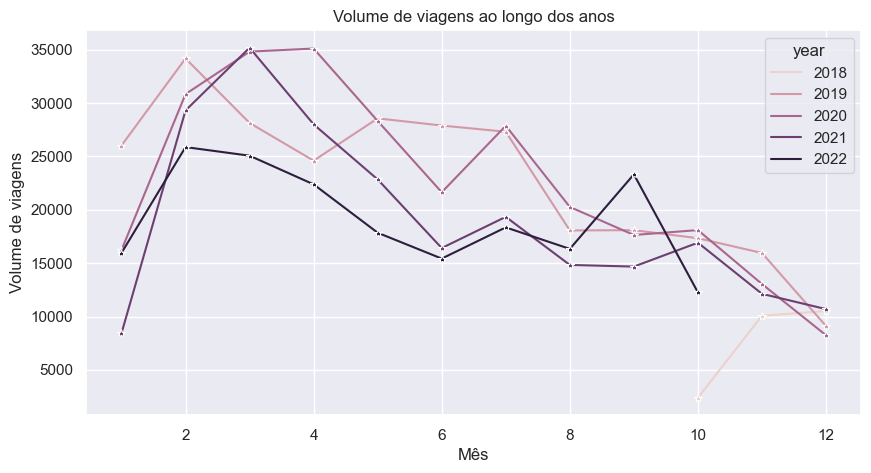

In [24]:
sns.set(rc={'figure.figsize':(10,5)})

embarcadores = ['LDC Brasil']

col = 'VOLUME_VIAGENS'

df_aux = df_stats[df_stats['NOME_EMBARCADOR'].isin(embarcadores)][['year', 'month', 'NOME_EMBARCADOR', col]].groupby(['year', 'month', 'NOME_EMBARCADOR']).sum().reset_index()
sns.lineplot(data=df_aux, x='month', y='VOLUME_VIAGENS', marker='*', hue='year');

plt.title('Volume de viagens ao longo dos anos')
plt.xlabel('Mês')
plt.ylabel('Volume de viagens')
plt.show();

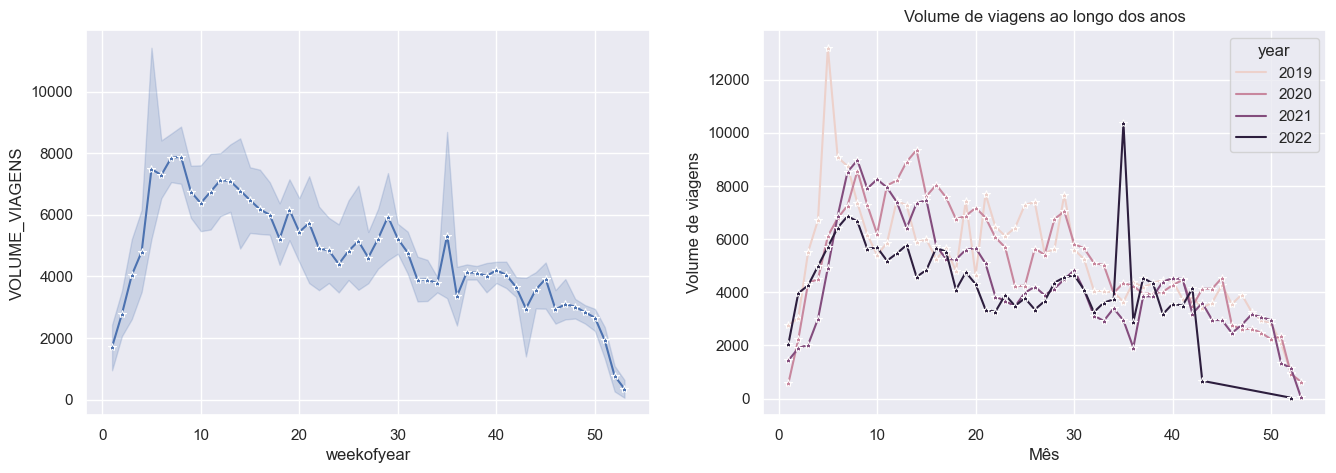

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

embarcadores = ['LDC Brasil']

col = 'VOLUME_VIAGENS'
cols_select = ['year', 'weekofyear', 'NOME_EMBARCADOR']

df_aux = df_stats[df_stats['NOME_EMBARCADOR'].isin(embarcadores)][cols_select+[col]].groupby(cols_select).sum().reset_index()


sns.lineplot(data=df_aux[df_aux['year']>2018], x='weekofyear', y='VOLUME_VIAGENS', marker='*', ax=ax[0]);
sns.lineplot(data=df_aux[df_aux['year']>2018], x='weekofyear', y='VOLUME_VIAGENS', marker='*', hue='year', ax=ax[1]);

plt.title('Volume de viagens ao longo dos anos')
plt.xlabel('Mês')
plt.ylabel('Volume de viagens')
plt.show();

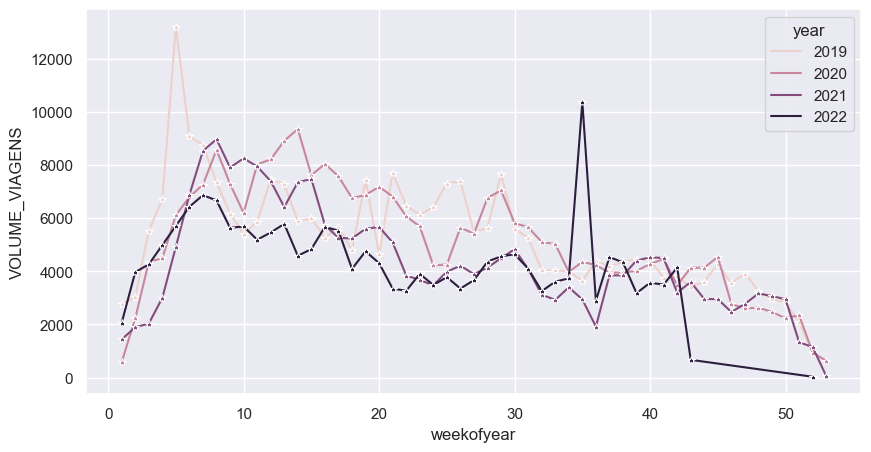

In [27]:
sns.lineplot(data=df_aux[df_aux['year']>2018], x='weekofyear', y='VOLUME_VIAGENS', marker='*', hue='year');

plt.show()

In [29]:
df_aux[df_aux['year']>2021].sort_values('weekofyear').value_counts()

year  weekofyear  NOME_EMBARCADOR  VOLUME_VIAGENS
2022  1           LDC Brasil       2061              1
      2           LDC Brasil       3970              1
      25          LDC Brasil       3780              1
      26          LDC Brasil       3352              1
      27          LDC Brasil       3668              1
      28          LDC Brasil       4365              1
      29          LDC Brasil       4565              1
      30          LDC Brasil       4642              1
      31          LDC Brasil       4103              1
      32          LDC Brasil       3255              1
      33          LDC Brasil       3610              1
      34          LDC Brasil       3738              1
      35          LDC Brasil       10374             1
      36          LDC Brasil       2894              1
      37          LDC Brasil       4539              1
      38          LDC Brasil       4333              1
      39          LDC Brasil       3178              1
      40       

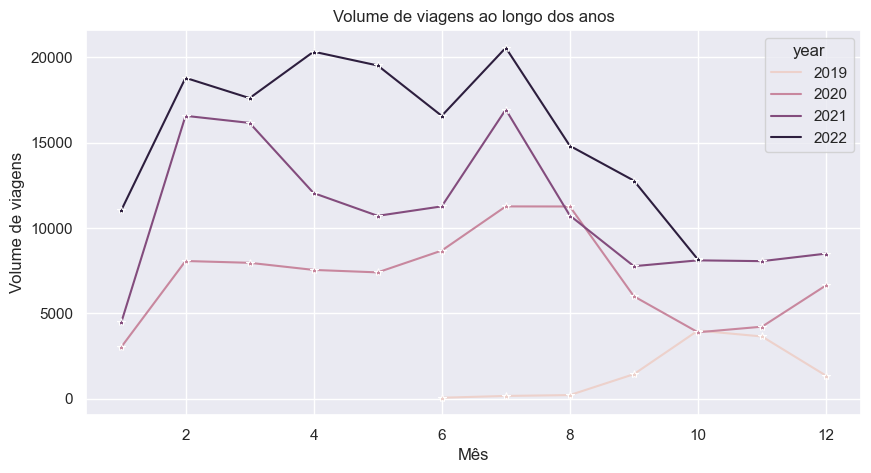

In [233]:
sns.set(rc={'figure.figsize':(10,5)})

embarcadores = ['Amaggi']

col = 'VOLUME_VIAGENS'

df_aux = df_stats[df_stats['NOME_EMBARCADOR'].isin(embarcadores)][['year', 'month', 'NOME_EMBARCADOR', col]].groupby(['year', 'month', 'NOME_EMBARCADOR']).sum().reset_index()
sns.lineplot(data=df_aux[df_aux['year']>2018], x='month', y='VOLUME_VIAGENS', marker='*', hue='year');

plt.title('Volume de viagens ao longo dos anos')
plt.xlabel('Mês')
plt.ylabel('Volume de viagens')
plt.show();

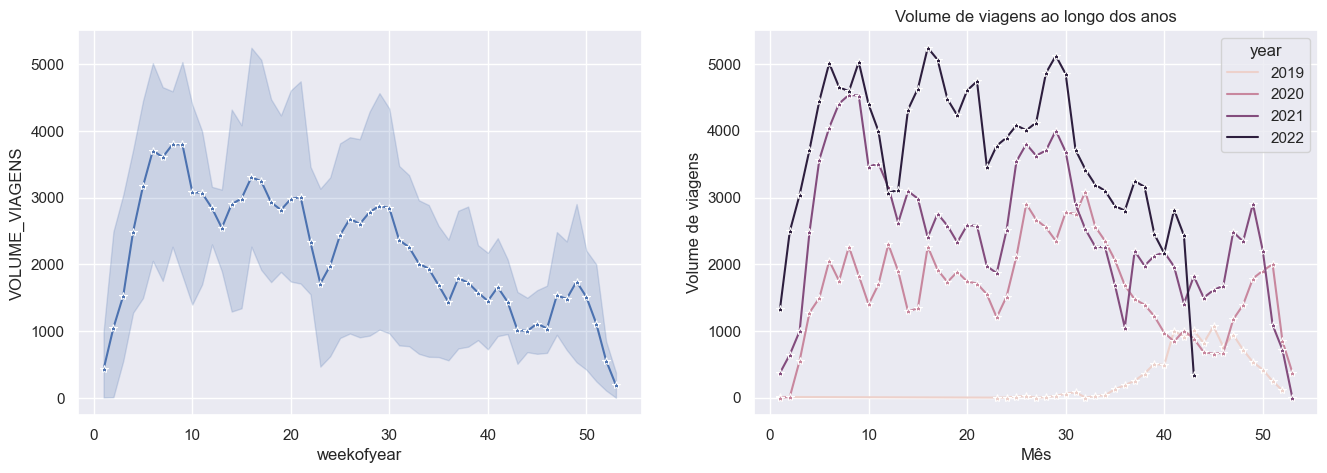

In [234]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

embarcadores = ['Amaggi']

col = 'VOLUME_VIAGENS'
cols_select = ['year', 'weekofyear', 'NOME_EMBARCADOR']

df_aux = df_stats[df_stats['NOME_EMBARCADOR'].isin(embarcadores)][cols_select+[col]].groupby(cols_select).sum().reset_index()

sns.lineplot(data=df_aux[df_aux['year']>2018], x='weekofyear', y='VOLUME_VIAGENS', marker='*', ax=ax[0]);
sns.lineplot(data=df_aux[df_aux['year']>2018], x='weekofyear', y='VOLUME_VIAGENS', marker='*', hue='year', ax=ax[1]);

plt.title('Volume de viagens ao longo dos anos')
plt.xlabel('Mês')
plt.ylabel('Volume de viagens')
plt.show();

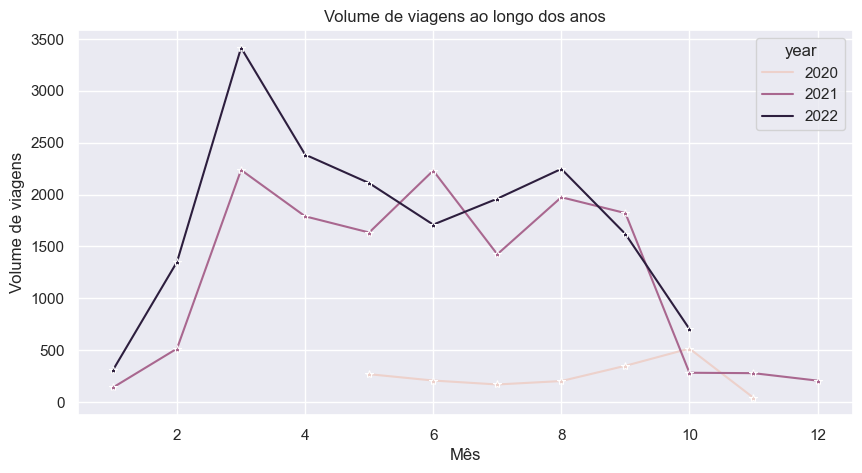

In [205]:
sns.set(rc={'figure.figsize':(10,5)})

embarcadores = ['ALZ']

col = 'VOLUME_VIAGENS'

df_aux = df_stats[df_stats['NOME_EMBARCADOR'].isin(embarcadores)][['year', 'month', 'NOME_EMBARCADOR', col]].groupby(['year', 'month', 'NOME_EMBARCADOR']).sum().reset_index()
sns.lineplot(data=df_aux[df_aux['year']>2018], x='month', y='VOLUME_VIAGENS', marker='*', hue='year');

plt.title('Volume de viagens ao longo dos anos')
plt.xlabel('Mês')
plt.ylabel('Volume de viagens')
plt.show();

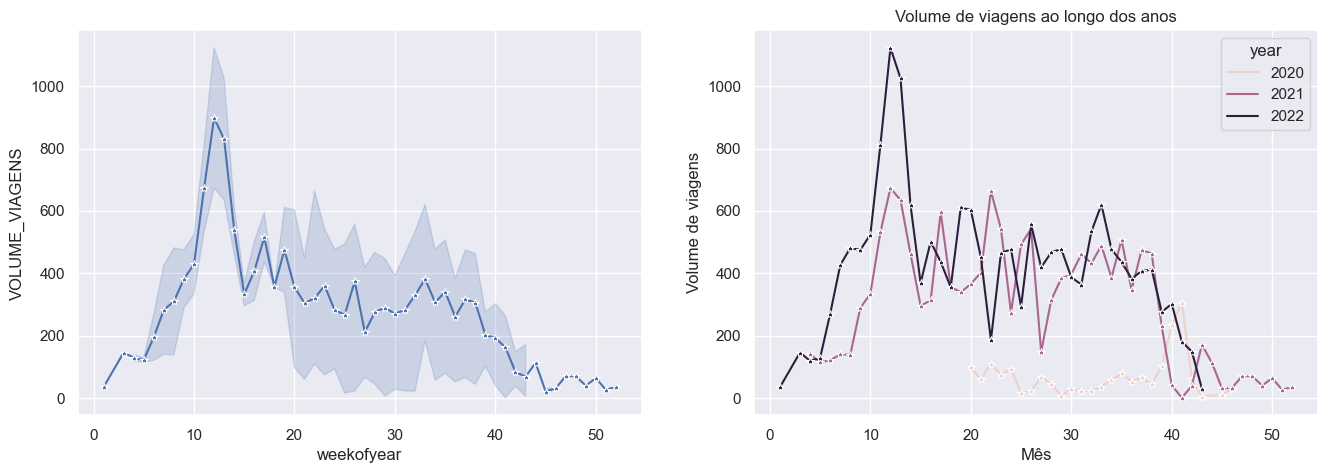

In [235]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

embarcadores = ['ALZ']

col = 'VOLUME_VIAGENS'
cols_select = ['year', 'weekofyear', 'NOME_EMBARCADOR']

df_aux = df_stats[df_stats['NOME_EMBARCADOR'].isin(embarcadores)][cols_select+[col]].groupby(cols_select).sum().reset_index()

sns.lineplot(data=df_aux[df_aux['year']>2018], x='weekofyear', y='VOLUME_VIAGENS', marker='*', ax=ax[0]);
sns.lineplot(data=df_aux[df_aux['year']>2018], x='weekofyear', y='VOLUME_VIAGENS', marker='*', hue='year', ax=ax[1]);

plt.title('Volume de viagens ao longo dos anos')
plt.xlabel('Mês')
plt.ylabel('Volume de viagens')
plt.show();

## 5.0 Data Preparation 

In [329]:
df_pp = df_raw[(df_raw['DT_CARREGAMENTO']>='2020-10-09') & (df_raw['NOME_EMBARCADOR']=='LDC Brasil')].copy()
df_pp.head()

,DT_CARREGAMENTO,NOME_EMBARCADOR,VOLUME_VIAGENS
1291,2020-10-09,LDC Brasil,482
1294,2020-10-10,LDC Brasil,152
1297,2020-10-11,LDC Brasil,34
1300,2020-10-12,LDC Brasil,56
1303,2020-10-13,LDC Brasil,355


In [330]:
df_pp = df_pp.set_index('DT_CARREGAMENTO')
df_pp.index = pd.DatetimeIndex(df_pp.index).to_period('W')

In [331]:
df_pp = df_pp.drop(columns=['NOME_EMBARCADOR'])

## 6.0 Modeling

In [332]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [353]:
model = SimpleExpSmoothing(endog=df_pp['VOLUME_VIAGENS'])
model_fitted = model.fit()

In [376]:
print('coefficients', model_fitted.params)

start = df_raw['DT_CARREGAMENTO'].iloc[-1]
df_aux_range = pd.date_range(start, periods=10)#.to_period('W')

predictions = model_fitted.predict(start=df_pp.index[0], end=df_pp.index[-1]+10)

df_predictions = pd.DataFrame(predictions).reset_index()

df_predictions = pd.DataFrame(predictions).reset_index()
df_predictions.columns = ['week', 'pred']

print(df_predictions)

coefficients {'smoothing_level': 0.18629683296812624, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 469.80809850790223, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
                      week        pred
0    2020-10-05/2020-10-11  469.808099
1    2020-10-12/2020-10-18  472.079411
2    2020-10-19/2020-10-25  412.449631
3    2020-10-26/2020-11-01  341.945663
4    2020-11-02/2020-11-08  288.674892
..                     ...         ...
113  2022-12-05/2022-12-11  382.709863
114  2022-12-12/2022-12-18  386.303554
115  2022-12-19/2022-12-25  362.028415
116  2022-12-26/2023-01-01  398.723597
117  2023-01-02/2023-01-08  438.083722

[118 rows x 2 columns]


In [391]:
df_pp = df_pp.reset_index()

In [395]:
df_pp

,DT_CARREGAMENTO,VOLUME_VIAGENS
0,2020-10-05/2020-10-11,482
1,2020-10-05/2020-10-11,152
2,2020-10-05/2020-10-11,34
3,2020-10-12/2020-10-18,56
4,2020-10-12/2020-10-18,355
...,...,...
742,2022-10-17/2022-10-23,502
743,2022-10-17/2022-10-23,229
744,2022-10-17/2022-10-23,104
745,2022-10-24/2022-10-30,409


TypeError: float() argument must be a string or a real number, not 'Period'

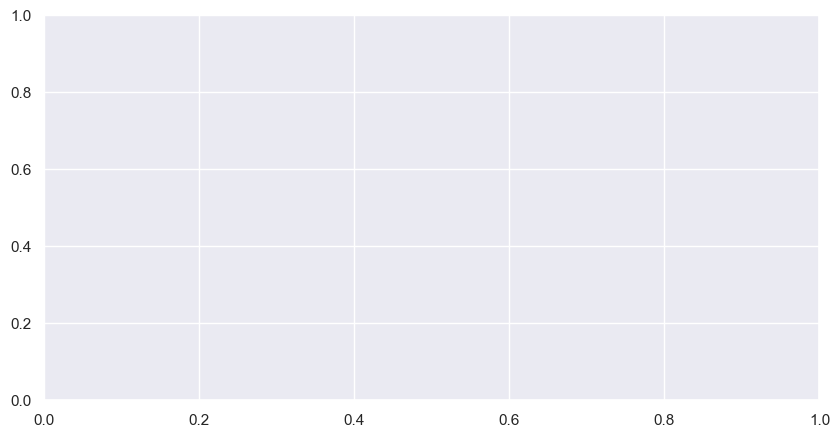

In [406]:
#plt.plot(df_pp.index, df_pp, label='Train')
plt.plot(predictions.index, predictions, label='Holt-Winters')
plt.legend(loc='best')

TypeError: float() argument must be a string or a real number, not 'Period'

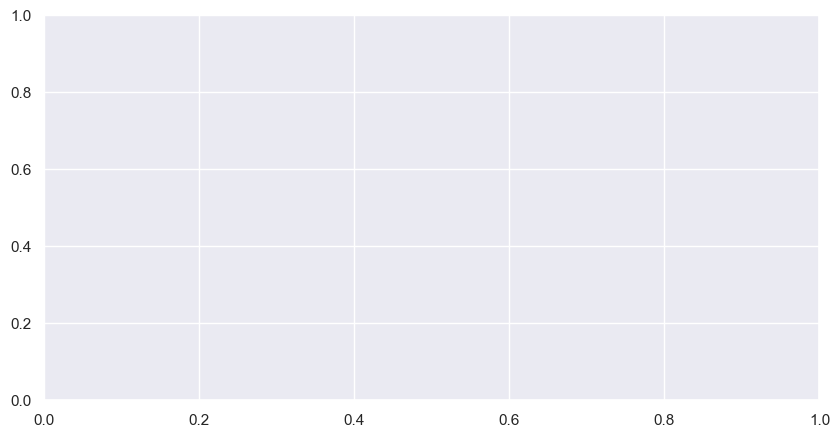

In [352]:
#plt.plot(df_pp.index, df_pp, label='Train')
#plt.plot(test.index, test, label='Test')
plt.plot(predictions.index, predictions, label='Holt-Winters')
plt.legend(loc='best')